<a href="https://colab.research.google.com/github/geekevgin/-Python/blob/main/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
!tar -xzvf "/content/clinical.project-tcga-dlbc.2023-09-20.tar.gz"

clinical.tsv
family_history.tsv
exposure.tsv
pathology_detail.tsv
follow_up.tsv


In [3]:
df = pd.read_csv('clinical.tsv', sep = '\t')
df.head()

,case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_residence_at_enrollment,days_to_birth,days_to_death,...,treatment_arm,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_type
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,61,'--,'--,'--,'--,-22454,248,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,61,'--,'--,'--,'--,-22454,248,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
2,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,73,'--,'--,'--,'--,-27025,58,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
3,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,73,'--,'--,'--,'--,-27025,58,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"
4,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,TCGA-DLBC,27,'--,'--,'--,'--,-10075,391,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"


In [4]:
print(f'Размер dataset: {df.shape}')
print('Пустые значения' if df.isna().any().any() else('Пустых значений нет'))
clinical_df = [i for i in df.columns if df[i].nunique() != 1] #возьмем столбцы, где кол-во уникальных значений больше 1
clinical = df[clinical_df]
clinical = clinical.replace("'--", np.nan) # удалим '--
clinical = clinical.replace('no', 'No') #заменим в одном формате чтения
clinical = clinical.replace('yes', 'Yes')

Размер dataset: (106, 158)
Пустых значений нет


In [5]:
clinical.head(2) # датасет на выходе

,case_id,case_submitter_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,...,prior_malignancy,prior_treatment,progression_or_recurrence,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_or_therapy,treatment_type
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,...,No,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,Yes,"Pharmaceutical Therapy, NOS"
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,...,No,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,No,"Radiation Therapy, NOS"


In [6]:
clinical.columns

Index(['case_id', 'case_submitter_id', 'age_at_index', 'days_to_birth',
       'days_to_death', 'ethnicity', 'gender', 'race', 'vital_status',
       'year_of_birth', 'year_of_death', 'age_at_diagnosis',
       'ann_arbor_b_symptoms', 'ann_arbor_clinical_stage',
       'ann_arbor_extranodal_involvement', 'classification_of_tumor',
       'days_to_diagnosis', 'days_to_last_follow_up', 'icd_10_code',
       'last_known_disease_status', 'morphology', 'primary_diagnosis',
       'prior_malignancy', 'prior_treatment', 'progression_or_recurrence',
       'site_of_resection_or_biopsy', 'synchronous_malignancy',
       'tissue_or_organ_of_origin', 'tumor_grade', 'year_of_diagnosis',
       'treatment_or_therapy', 'treatment_type'],
      dtype='object')

In [42]:
count_features = ['age_at_index', 'days_to_birth', 'days_to_death','year_of_birth','age_at_diagnosis',
                  'days_to_last_follow_up', 'year_of_diagnosis']

cat_features = [i for i in clinical.columns if i not in count_features] #создадим категориальные и кол-е данные

In [43]:
for i in count_features:
  clinical[i] = clinical[i].astype('float') # Переведем в тип числовой

In [44]:
for i in cat_features:
  clinical[i] = clinical[i].astype('category') # Переведем в тип категориальный

In [45]:
clinical.describe() # описательная статистика

,age_at_index,days_to_birth,days_to_death,year_of_birth,age_at_diagnosis,days_to_last_follow_up,year_of_diagnosis
count,96.000000,96.000000,18.000000,96.000000,96.000000,86.000000,96.000000
mean,56.270833,-20731.354167,1504.777778,1952.875000,20731.354167,1274.372093,2009.145833
std,13.874231,5080.518956,2065.507759,15.092173,5080.518956,1307.703277,5.005217
min,23.000000,-30256.000000,58.000000,1923.000000,8493.000000,0.000000,1987.000000
25%,46.000000,-24607.750000,313.000000,1941.000000,16998.250000,434.250000,2009.000000
50%,57.500000,-21146.500000,595.000000,1951.500000,21146.500000,832.000000,2011.000000
75%,67.000000,-16998.250000,1252.000000,1963.250000,24607.750000,1581.000000,2012.000000
max,82.000000,-8493.000000,6425.000000,1987.000000,30256.000000,5980.000000,2013.000000


In [46]:
clinical.describe(include=['category'])

,case_id,case_submitter_id,ethnicity,gender,race,vital_status,year_of_death,ann_arbor_b_symptoms,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,...,primary_diagnosis,prior_malignancy,prior_treatment,progression_or_recurrence,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,treatment_or_therapy,treatment_type
count,106,106,96,96,96,96,10,92,84,92,...,96,96,96,96,96,96,96,96,96,96
unique,58,58,2,2,3,2,4,2,4,2,...,1,1,2,1,20,1,20,1,3,2
top,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-8693,not hispanic or latino,female,white,Alive,2012,No,Stage II,No,...,"Malignant lymphoma, large B-cell, diffuse, NOS",No,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,Yes,"Pharmaceutical Therapy, NOS"
freq,2,2,72,52,58,78,4,70,34,50,...,96,96,94,96,32,96,32,96,51,48


array([[<Axes: title={'center': 'age_at_index'}>,
        <Axes: title={'center': 'days_to_birth'}>,
        <Axes: title={'center': 'days_to_death'}>],
       [<Axes: title={'center': 'year_of_birth'}>,
        <Axes: title={'center': 'age_at_diagnosis'}>,
        <Axes: title={'center': 'days_to_last_follow_up'}>],
       [<Axes: title={'center': 'year_of_diagnosis'}>, <Axes: >,
        <Axes: >]], dtype=object)

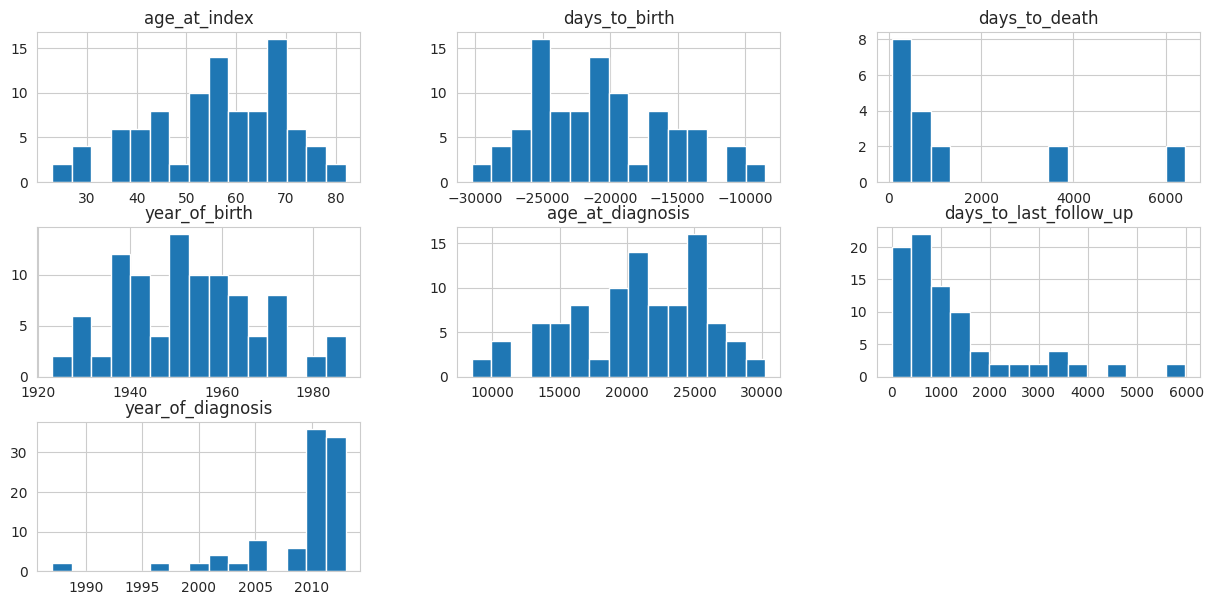

In [47]:
clinical[count_features].hist(figsize=(15,7), bins = 15) #почти все кол-е переменные стремятся к нормальному распределению

<Axes: xlabel='age_at_index'>

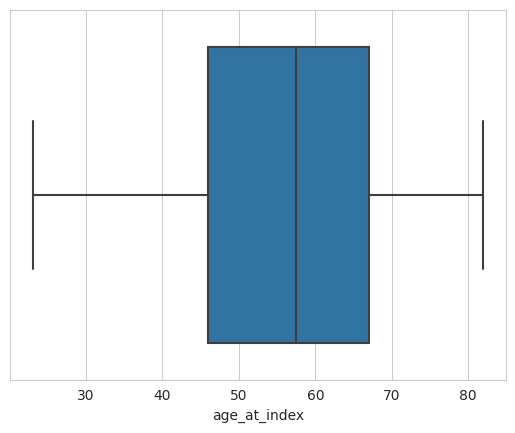

In [48]:
sns.boxplot(data = clinical,
            x = clinical['age_at_index']) #средний возраст пациентов 57-58

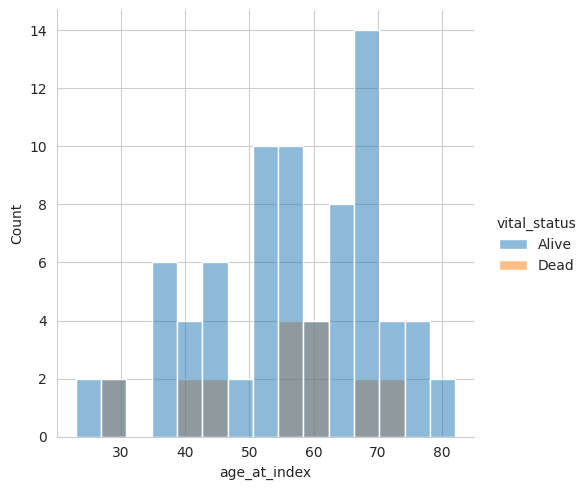

In [49]:
#age at index
sns.displot(data = clinical,
            x = clinical['age_at_index'],
            hue = clinical['vital_status'],
            bins = 15,
            legend = True) # средний возраст живых пациентов50-58 лет, умерщих - 55-60

<Axes: xlabel='days_to_birth'>

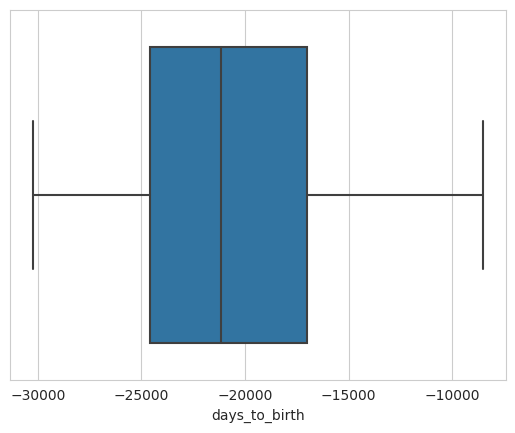

In [51]:
#days_to_birth
sns.boxplot(data = clinical,
            x = clinical['days_to_birth'])

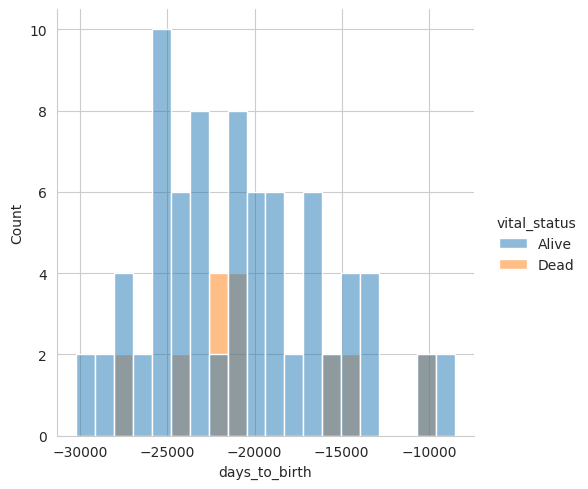

In [52]:
sns.displot(data = clinical,
            x = clinical['days_to_birth'],
            hue = clinical['vital_status'],
            bins = 20,
            legend = True)

<Axes: xlabel='days_to_death'>

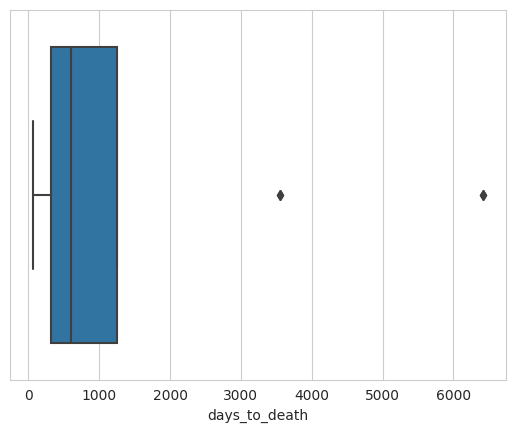

In [53]:
#days_to_death
sns.boxplot(data = clinical,
            x = clinical['days_to_death']) # среднее кол-во дней от дня смерти 600(2 года), есть пару выбросов

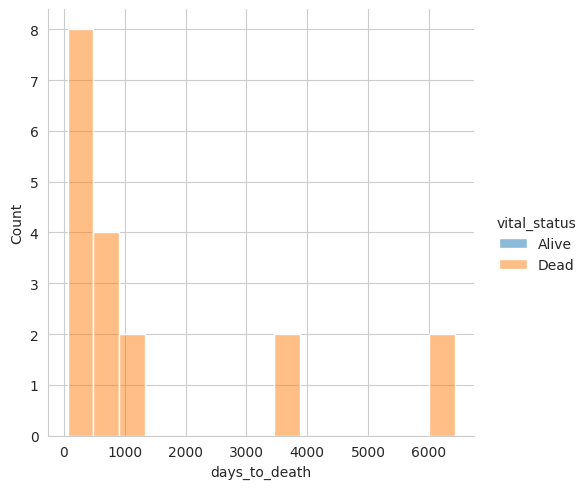

In [54]:
sns.displot(data = clinical,
            x = clinical['days_to_death'],
            hue = clinical['vital_status'],
            bins = 15,
            legend = True) #больше всего пацентов умерло 500-700 дней наазад

<Axes: xlabel='year_of_birth'>

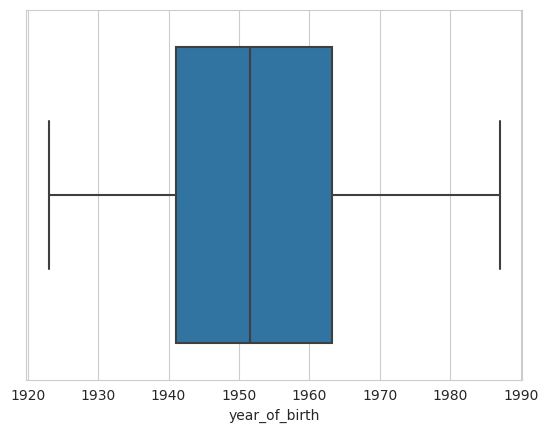

In [55]:
#year_of_birth
sns.boxplot(data = clinical,
            x = clinical['year_of_birth']) #основная часть пациентов имеет год рождения 50е

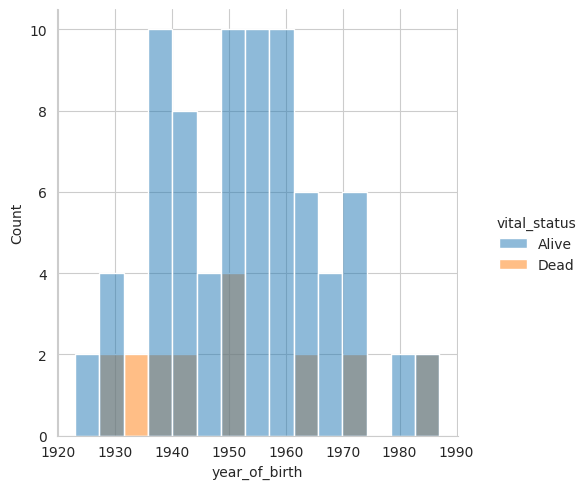

In [56]:
sns.displot(data = clinical,
            x = clinical['year_of_birth'],
            hue = clinical['vital_status'],
            bins = 15,
            legend = True) #и основная часть пациентов, рожденных в 1950-60 жива

<Axes: xlabel='age_at_diagnosis'>

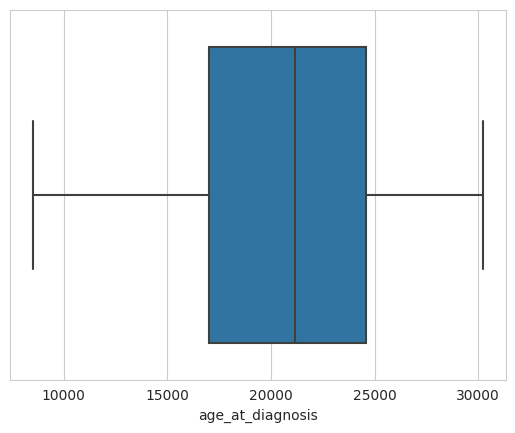

In [57]:
#age_at_diagnosis
sns.boxplot(data = clinical,
            x = clinical['age_at_diagnosis']) #средний возраст на момент постановки диагноза в днях 21000

<Axes: xlabel='gender', ylabel='age_at_diagnosis'>

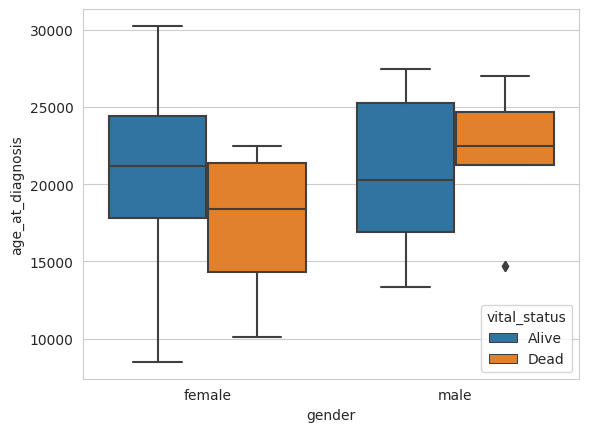

In [58]:
sns.boxplot(data = clinical,
            x = 'gender',
            y = 'age_at_diagnosis',
            hue = 'vital_status')

# Примерно в одном возрасте диагностируют рак как женщинам так и мужчинам среди живых. Среди умерщих пациентов женщинам был поставлен диагноз в ранеем возрасте

<Axes: xlabel='days_to_last_follow_up'>

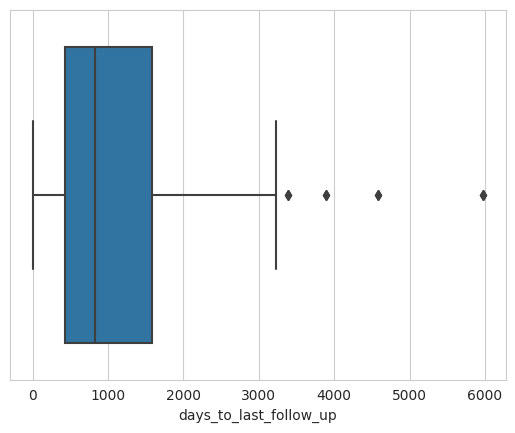

In [59]:
#days_to_diagnosis
sns.boxplot(data = clinical,
            x = clinical['days_to_last_follow_up'])

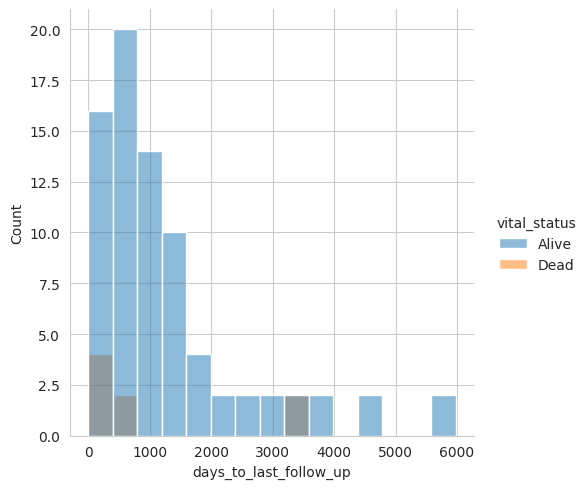

In [60]:
sns.displot(data = clinical,
            x = clinical['days_to_last_follow_up'],
            hue = clinical['vital_status'],
            bins = 15,
            legend = True) # кол-во осмотров уменьшается по мере увелечения продолжительности ремиссии

<Axes: xlabel='year_of_diagnosis'>

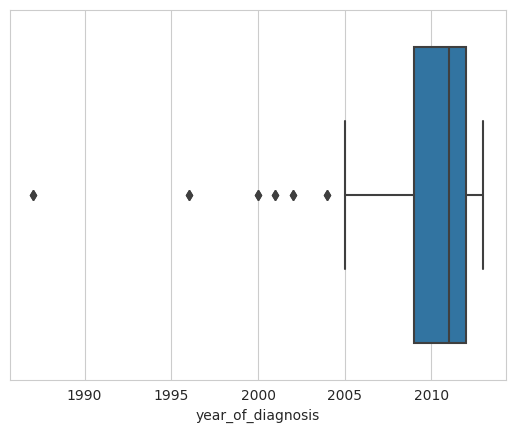

In [61]:
#year_of_diagnosis
sns.boxplot(data = clinical,
            x = clinical['year_of_diagnosis']) # средний период времени постановки диагноза -2012 год. Что можно связать как с возрастом пациента(чем старше, тем больше риск), так и улучшение диагностики

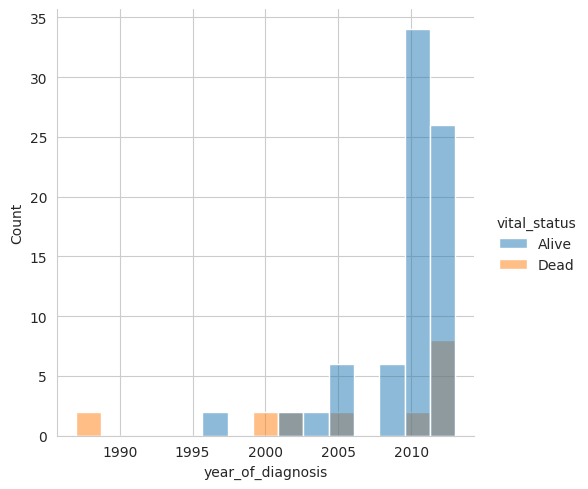

In [62]:
sns.displot(data = clinical,
            x = clinical['year_of_diagnosis'],
            hue = clinical['vital_status'],
            bins = 15,
            legend = True)

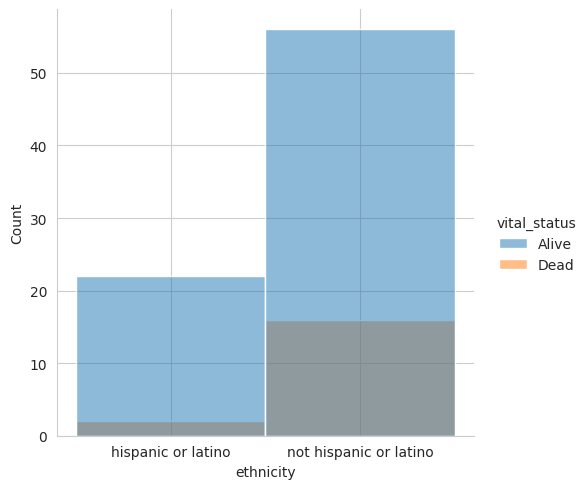

In [65]:
#cat_feature
#ethnicity

sns.displot(data = clinical,
            x = clinical['ethnicity'],
            hue = clinical['vital_status'],
            legend = True) #основная масса пациента не принадлежит латиносам)

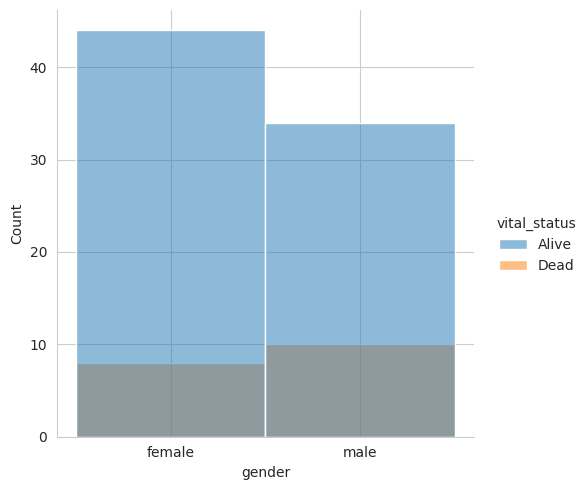

In [66]:
#gender
sns.displot(data = clinical,
            x = clinical['gender'],
            hue = clinical['vital_status'],
            legend = True) #кол-во живых и умерщих мужчин и женщин примерно одинаково, но выборка незначительна, чтобы делать точные выводы

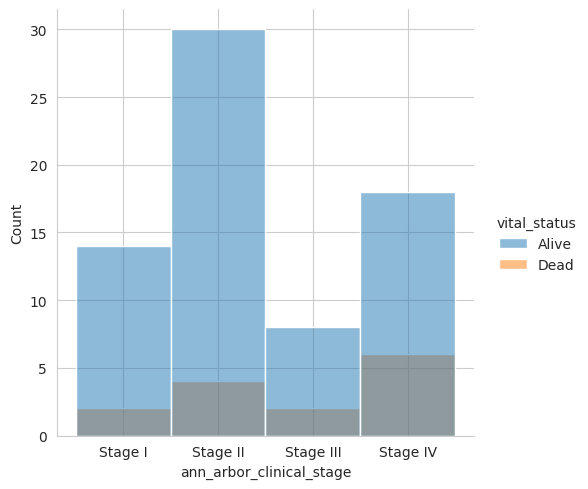

In [67]:
#ann_arbor_clinical_stage
sns.displot(data = clinical,
            x = clinical['ann_arbor_clinical_stage'],
            hue = clinical['vital_status'],
            legend = True) #больше всего пациентов со 2й стадией заболевания, что может быть связано с тем, что ее раньше диагностируют, больше всего умерщих на 4й стадии, тк чаще всего стадия терминальная
            #  меньше всего умерщих на 1й стадии, тк рак in situ, интересно узнать причину смерти пациентвов с 1й стадией

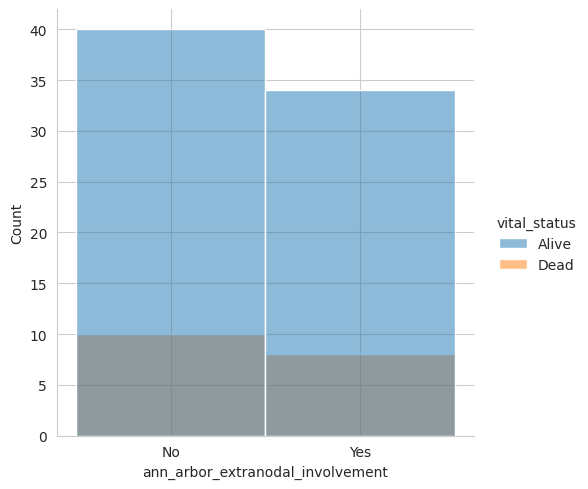

In [71]:
#ann_arbor_extranodal_involvement
sns.displot(data = clinical,
            x = clinical['ann_arbor_extranodal_involvement'],
            hue = clinical['vital_status'],
            legend = True) # метастазы были у обеих групп. При этом кол-во умерщих одинаково в обеих группах, думаю, что небольшой набор данных искажает картину

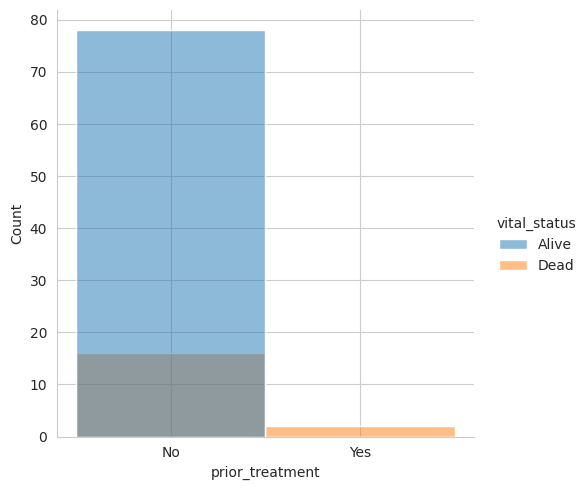

In [72]:
#prior_treatment
sns.displot(data = clinical,
            x = clinical['prior_treatment'],
            hue = clinical['vital_status'],
            legend = True)

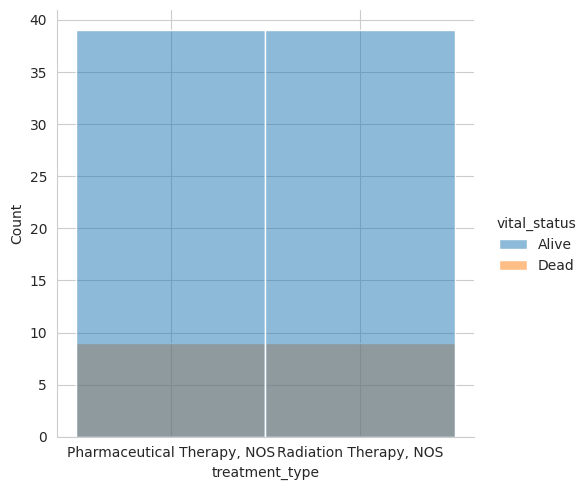

In [87]:
#treatment_type

sns.displot(data = clinical,
            x = clinical['treatment_type'],
            hue = clinical['vital_status'],
            legend = True)

<Axes: xlabel='treatment_type'>

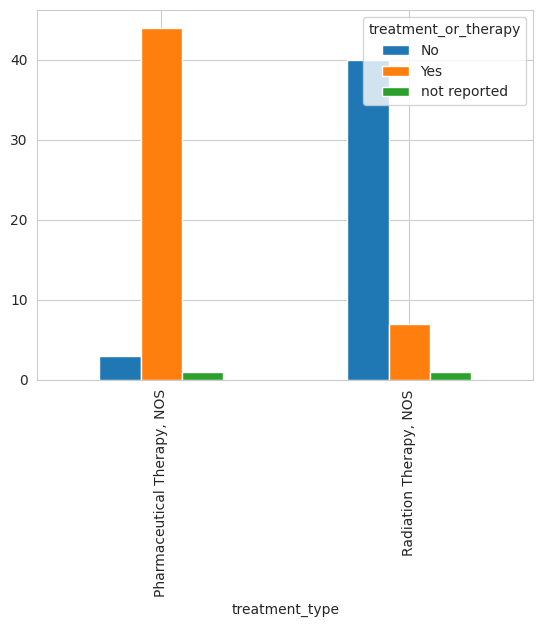

In [84]:
treatment = pd.crosstab([clinical.treatment_type], [clinical.treatment_or_therapy])
treatment.plot(kind = 'bar')
#чаще всего применялась химиотерапия, лучевая терапия использовалась только у 8 пациентов(маленькая выборка, чтобы судить об эффективности)

In [ ]:
# Максимальный возраст дебюта заболевания соотвестует 50-70 лет(судя по году рождения пациетов и их возрасту)
# Пол не влияет(примерно одинаквое соотношение кол-во живых и умерщих мужчин и женщин)
# По расе сказать не возможно,тк не достаточно данных(афроамереканцев несколько).
# Предпочтение отдается химиотерапии, возможно из-за противопоказанйи к лучевой(как множественные метастазы, тк почти у половины пациентов налюдаются метастазы
# и другие сопуствующие заболевания). Говорить об эффективности терапий не имеет быть возможным за счет недостаточного кол-ва данных и отсутствия данных на результат терапии.